In [1]:
import pandas as pd 
from utils.statistical import (
    calculate_cardinality,
    calculate_class_ratio,
    analyze_bias_crosstab,
    plot_gini_indexes,
    plot_entropies,
    chi_squared_test,
    calculate_cramers_v,
    plot_cramers_v_heatmap
)

%matplotlib inline

In [2]:
data = pd.read_csv("../../local_data/bills/generated_data/compiled_subjects.csv.gz", 
                 compression="gzip",
                 converters={"legislativeSubjects": pd.eval})

In [3]:
data.head()

,congress,billNumber,billType,legislativeSubjects,policyArea
0,111,432,sres,"[Cardiovascular and respiratory health, Commem...",Health
1,111,680,sres,"[Congressional tributes, Endangered and threat...",International Affairs
2,111,705,sres,[Administrative law and regulatory procedures],Congress
3,111,706,sres,"[Arms control and nonproliferation, Congressio...",Congress
4,111,707,sres,"[Congressional officers and employees, Congres...",Congress


In [4]:
calculate_cardinality(data, list(data.columns))

congress                 1
billNumber             153
billType                 8
legislativeSubjects    402
policyArea              29
dtype: int64

In [5]:
calculate_class_ratio(data, "billType", n=1)

Most dominant values in billType:
billType
hr    0.48366
Name: proportion, dtype: float64

Least dominant values in billType:
billType
sjres    0.006536
Name: proportion, dtype: float64


billType
hr         0.483660
s          0.346405
hres       0.071895
sres       0.032680
hjres      0.026144
sconres    0.019608
hconres    0.013072
sjres      0.006536
Name: proportion, dtype: float64

In [6]:
calculate_class_ratio(data, "legislativeSubjects", n=5)

Most dominant values in legislativeSubjects:
legislativeSubjects
Administrative law and regulatory procedures    0.024518
Government information and archives             0.021016
Congressional oversight                         0.021016
Executive agency funding and structure          0.017513
Congressional tributes                          0.015762
Name: proportion, dtype: float64

Least dominant values in legislativeSubjects:
legislativeSubjects
Water use and supply                   0.000876
Cooperative and condominium housing    0.000876
Department of Veterans Affairs         0.000876
Political advertising                  0.000876
Music                                  0.000876
Name: proportion, dtype: float64


legislativeSubjects
Administrative law and regulatory procedures    0.024518
Government information and archives             0.021016
Congressional oversight                         0.021016
Executive agency funding and structure          0.017513
Congressional tributes                          0.015762
                                                  ...   
Water use and supply                            0.000876
Cooperative and condominium housing             0.000876
Department of Veterans Affairs                  0.000876
Political advertising                           0.000876
Music                                           0.000876
Name: proportion, Length: 402, dtype: float64

In [7]:
calculate_class_ratio(data, "policyArea", n=5)

Most dominant values in policyArea:
policyArea
Government Operations and Politics    0.137255
Congress                              0.084967
Crime and Law Enforcement             0.065359
Law                                   0.065359
Transportation and Public Works       0.065359
Name: proportion, dtype: float64

Least dominant values in policyArea:
policyArea
Foreign Trade and International Finance    0.013072
Economics and Public Finance               0.006536
Arts, Culture, Religion                    0.006536
Social Sciences and History                0.006536
Social Welfare                             0.006536
Name: proportion, dtype: float64


policyArea
Government Operations and Politics             0.137255
Congress                                       0.084967
Crime and Law Enforcement                      0.065359
Law                                            0.065359
Transportation and Public Works                0.065359
Armed Forces and National Security             0.058824
International Affairs                          0.052288
Science, Technology, Communications            0.045752
Health                                         0.045752
Native Americans                               0.039216
Public Lands and Natural Resources             0.039216
Environmental Protection                       0.026144
Housing and Community Development              0.026144
Finance and Financial Sector                   0.026144
Emergency Management                           0.026144
Education                                      0.026144
Taxation                                       0.026144
Commerce                             

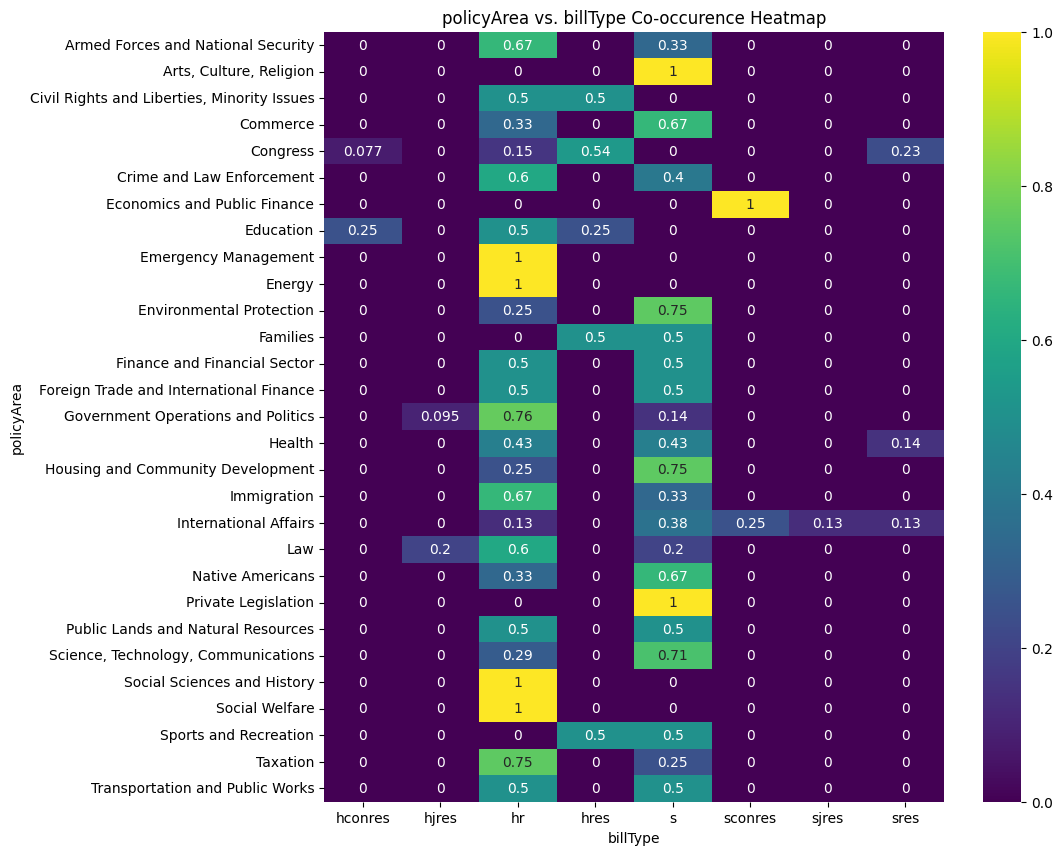

In [8]:
analyze_bias_crosstab(data, ["policyArea", "billType"])

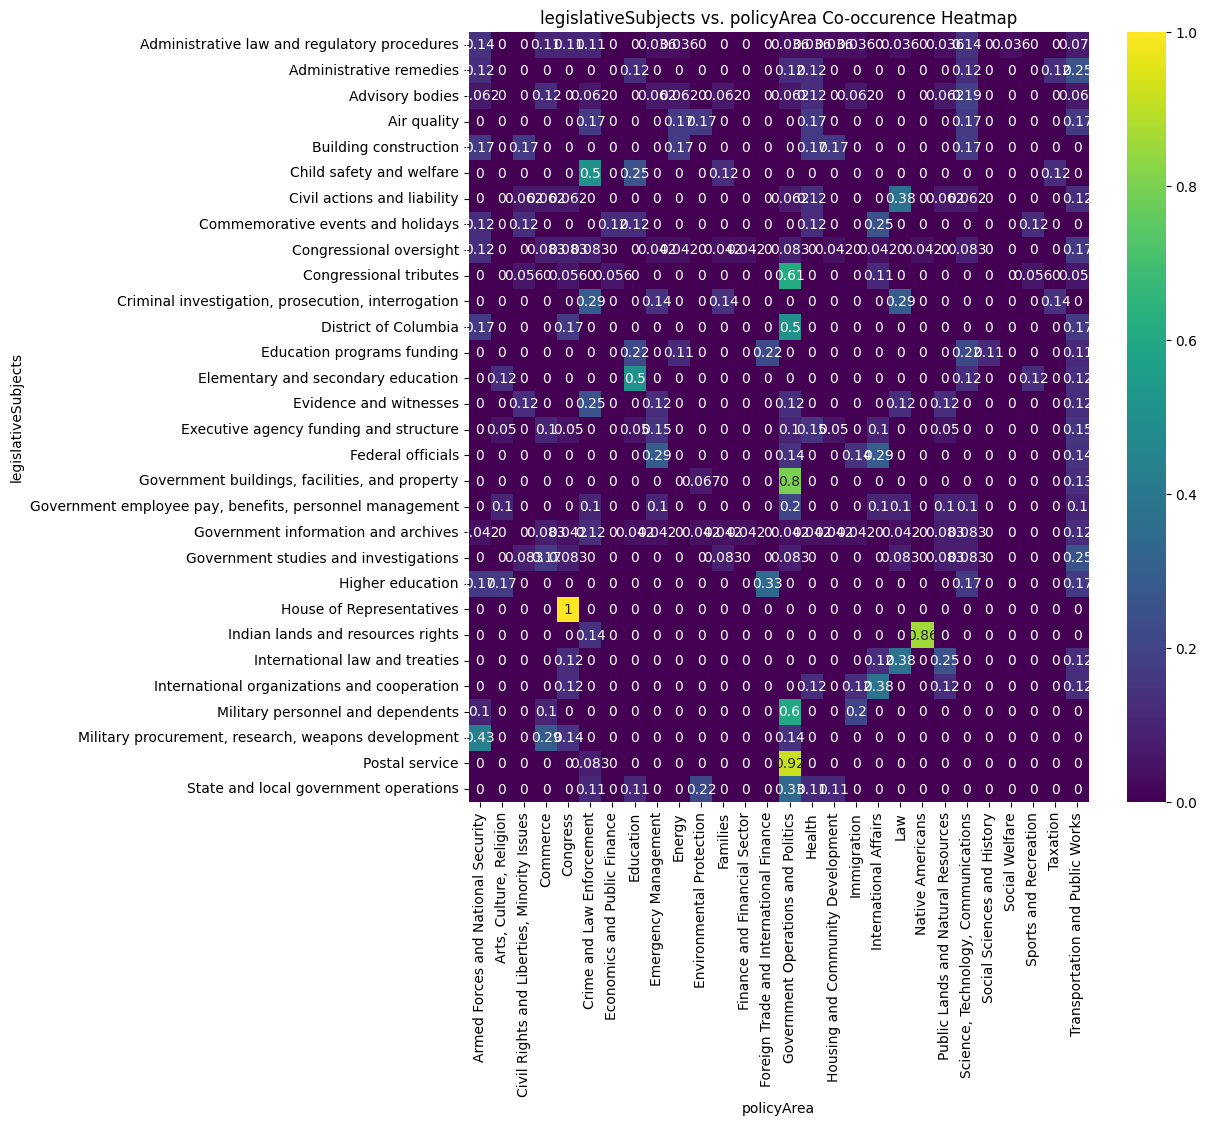

In [9]:
analyze_bias_crosstab(data, ["legislativeSubjects", "policyArea"], n=30)

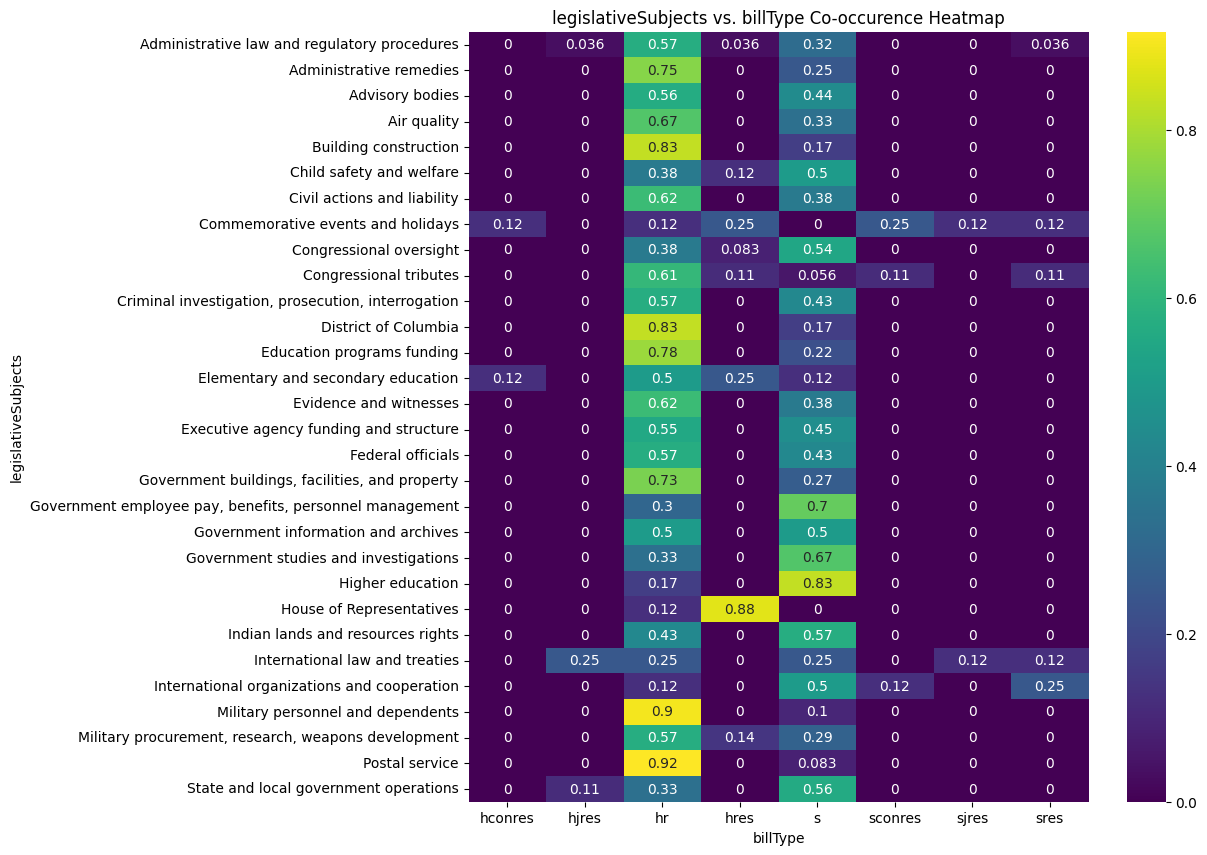

In [10]:
analyze_bias_crosstab(data, ["legislativeSubjects", "billType"], n=30)

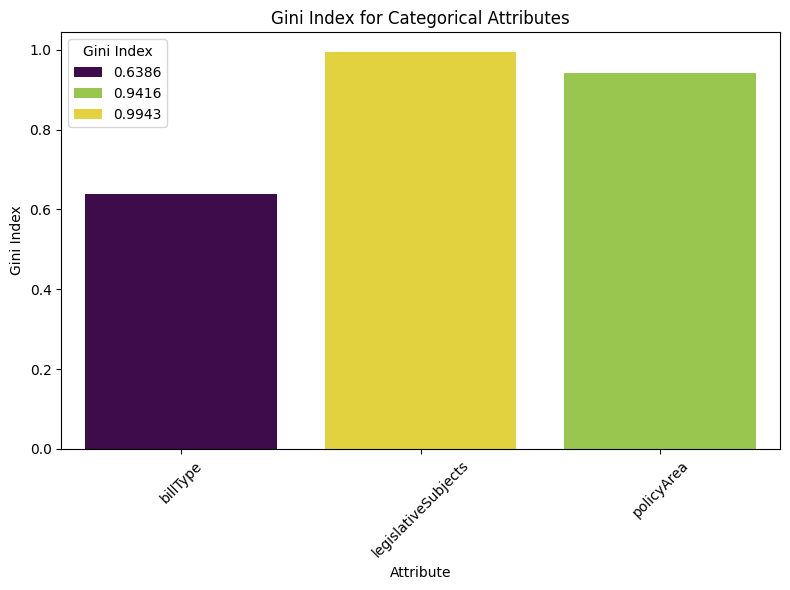

In [11]:
plot_gini_indexes(data, ["billType", "legislativeSubjects", "policyArea"])

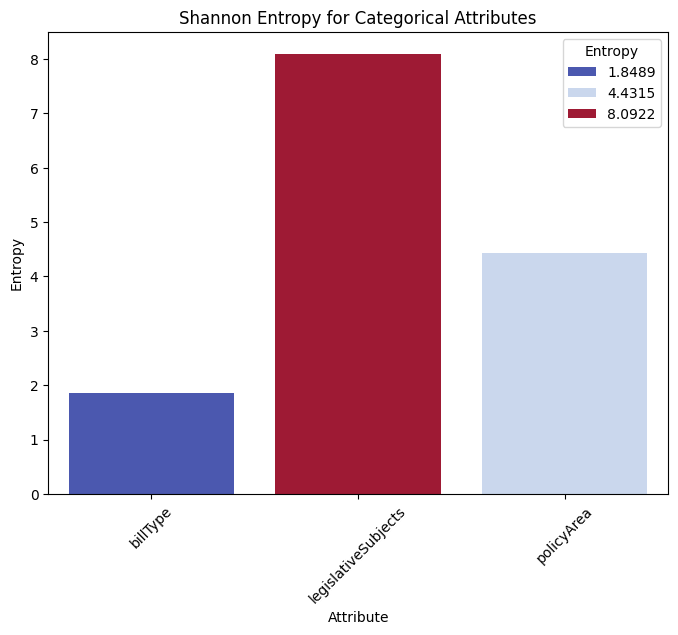

In [12]:
plot_entropies(data, ["billType", "legislativeSubjects", "policyArea"])

In [13]:
chi_squared_test(data, ["billType", "legislativeSubjects"])

{'Chi2 Statistic': np.float64(3377.5642),
 'P-value': np.float64(0.0),
 'Degrees of Freedom': 2807}

In [14]:
chi_squared_test(data, ["billType", "policyArea"])

{'Chi2 Statistic': np.float64(271.8013),
 'P-value': np.float64(0.0003),
 'Degrees of Freedom': 196}

In [15]:
chi_squared_test(data, ["billType", "legislativeSubjects"])

{'Chi2 Statistic': np.float64(3377.5642),
 'P-value': np.float64(0.0),
 'Degrees of Freedom': 2807}

In [16]:
calculate_cramers_v(data, ["billType", "legislativeSubjects"])

billType and legislativeSubjects: 
Cramer's V: 0.65 
Association: Strong association


In [17]:
calculate_cramers_v(data, ["billType", "policyArea"])

billType and policyArea: 
Cramer's V: 0.5038 
Association: Moderate association


In [18]:
calculate_cramers_v(data, ["policyArea", "legislativeSubjects"])

policyArea and legislativeSubjects: 
Cramer's V: 0.6805 
Association: Strong association


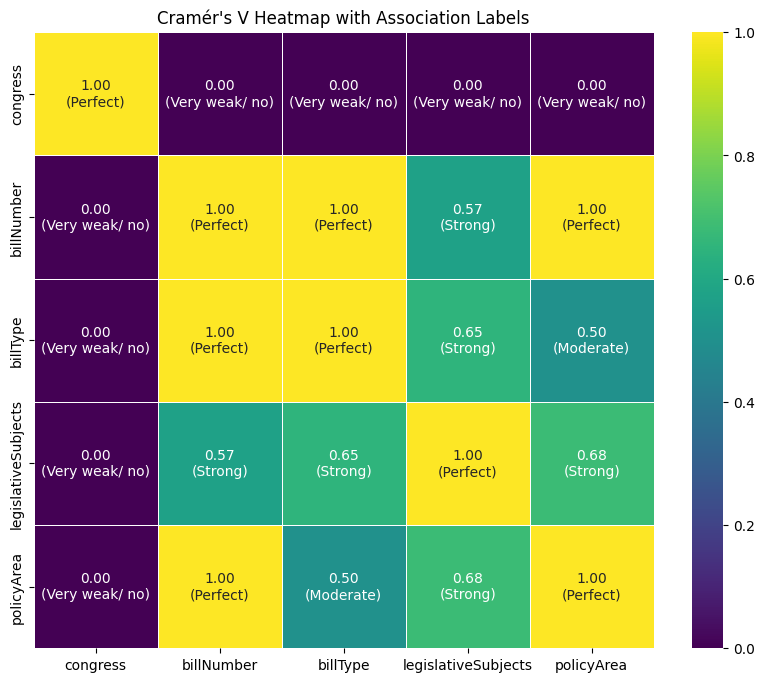

In [19]:
plot_cramers_v_heatmap(data, list(data.columns))